In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('Train.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
#info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [7]:
#describe
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [8]:
col= df.columns
col

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [9]:
df.shape

(8068, 11)

In [10]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [11]:
df= df.dropna()

In [12]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [15]:
import warnings
warnings.filterwarnings('ignore')

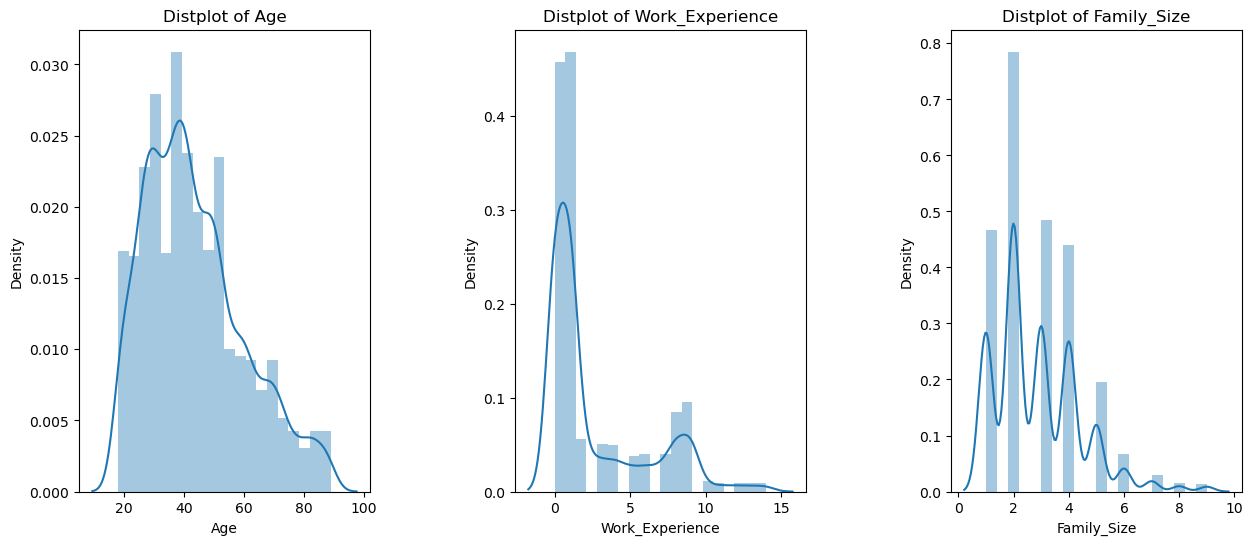

In [16]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Work_Experience' , 'Family_Size']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()


In [17]:
# check for segmentation columns
df.groupby('Segmentation')[[ 'Age','Work_Experience','Family_Size', 'Var_1']].agg('mean')

,Age,Work_Experience,Family_Size
Segmentation,,,
A,44.421411,2.888614,2.431931
B,48.113232,2.393766,2.682570
C,49.327907,2.224419,2.961628
D,32.956744,2.997154,3.241320


<AxesSubplot: xlabel='Segmentation'>

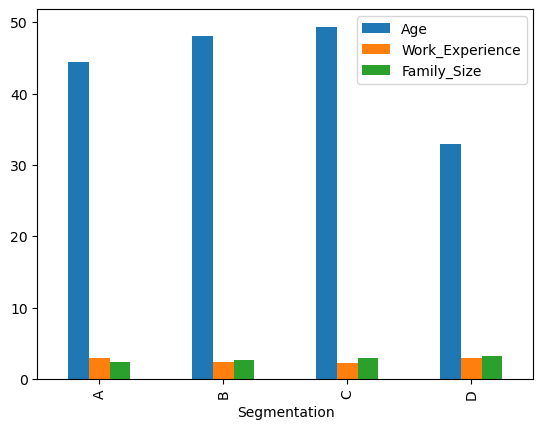

In [18]:
df.groupby('Segmentation')[[ 'Age','Work_Experience','Family_Size', 'Var_1']].agg('mean').plot(kind = 'bar')

In [19]:
df.groupby('Gender')[['Age','Work_Experience','Family_Size']].agg('mean')

,Age,Work_Experience,Family_Size
Gender,,,
Female,43.146252,2.826640,2.742972
Male,43.852869,2.468589,2.920859


<AxesSubplot: xlabel='Gender'>

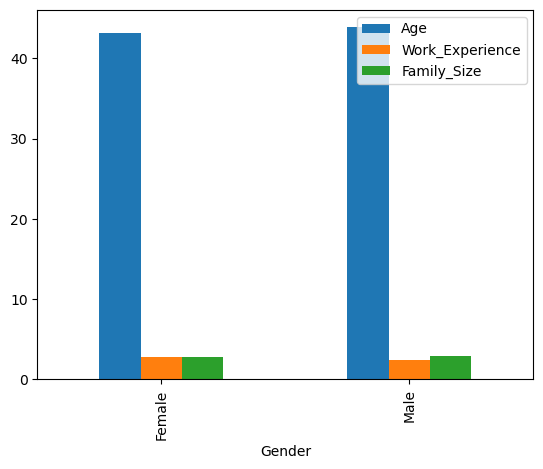

In [20]:
df.groupby('Gender')[['Age','Work_Experience','Family_Size']].agg('mean').plot(kind = 'bar')

In [21]:
# we will check for profession by gender
df.groupby(['Profession','Gender'])[['Gender']].count()

Gender
Profession    Gender        
Artist        Female    1055
              Male      1137
Doctor        Female     257
              Male       335
Engineer      Female     466
              Male       116
Entertainment Female     214
              Male       595
Executive     Female      22
              Male       483
Healthcare    Female     446
              Male       631
Homemaker     Female     144
              Male        31
Lawyer        Female     256
              Male       244
Marketing     Female     128
              Male       105

<AxesSubplot: xlabel='Profession,Gender'>

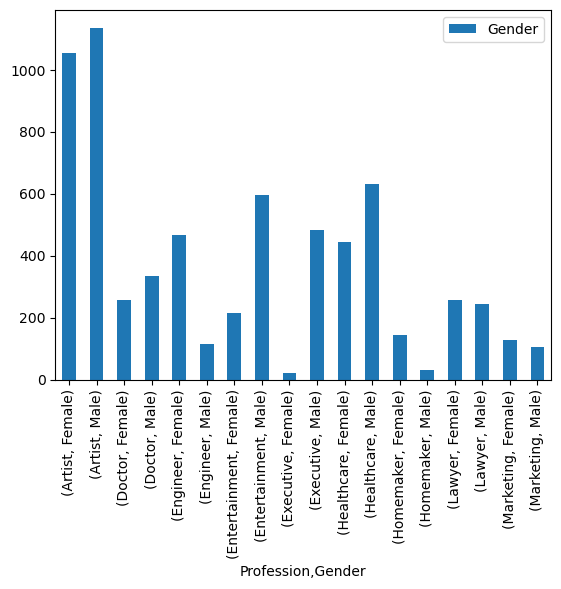

In [22]:
df.groupby(['Profession','Gender'])[['Gender']].count().plot(kind= 'bar')

In [23]:
# check the spending score by Gender
df.groupby(['Gender','Spending_Score'])[['Spending_Score']].count()

Spending_Score
Gender Spending_Score                
Female Average                    692
       High                       393
       Low                       1903
Male   Average                    970
       High                       611
       Low                       2096

<AxesSubplot: ylabel='Gender,Spending_Score'>

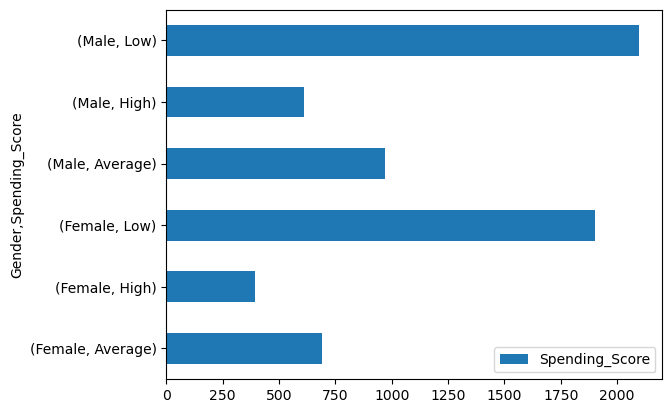

In [24]:
df.groupby(['Gender','Spending_Score'])[['Spending_Score']].count().plot(kind = 'barh')

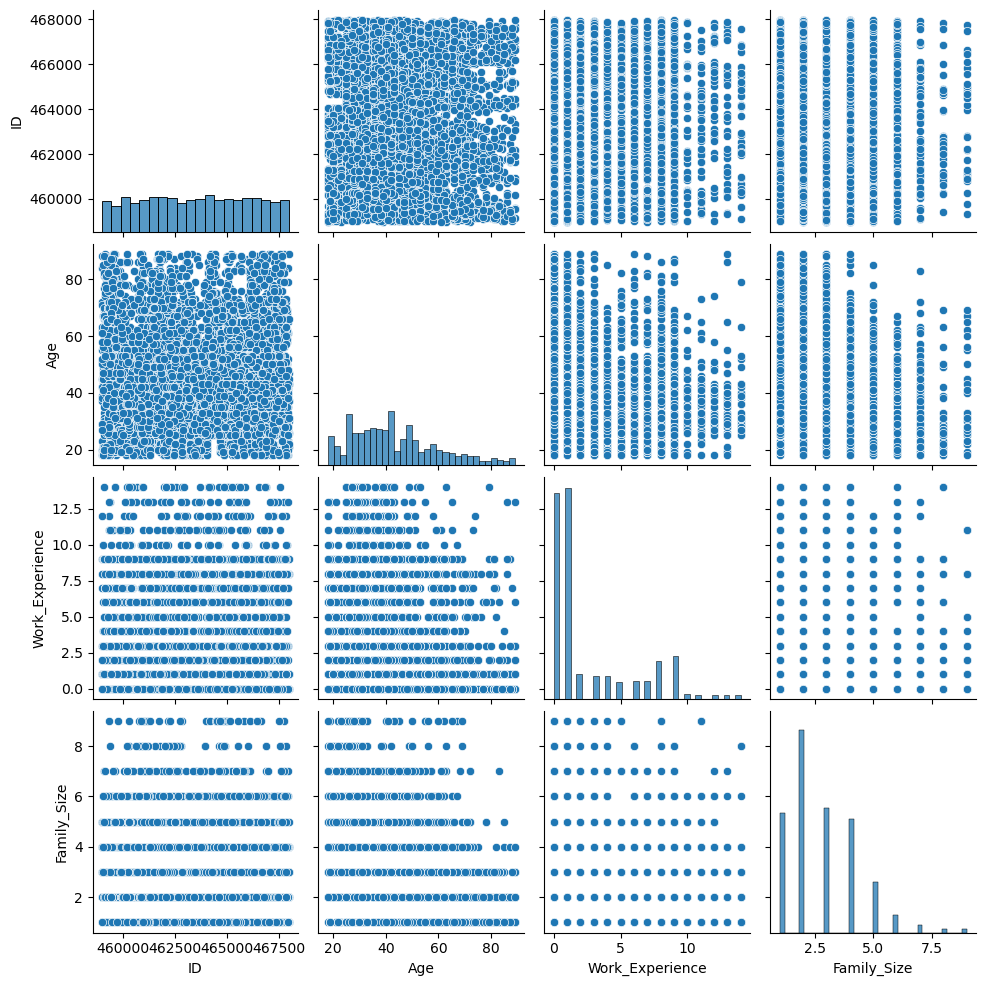

In [25]:
sns.pairplot(df)

__Checking for correlation__

<AxesSubplot: >

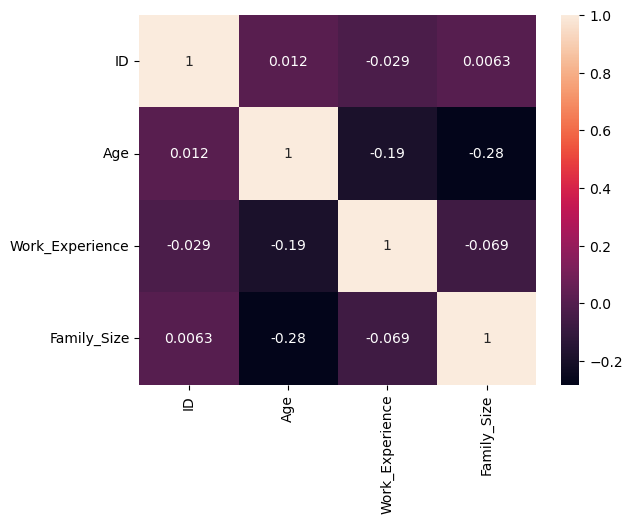

In [26]:
sns.heatmap(df.corr(),annot = True)

In [27]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [28]:
var = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
df_dummies = pd.get_dummies(df,columns=var)
print(df_dummies.columns.tolist())

['ID', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation', 'Gender_Female', 'Gender_Male', 'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes', 'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Spending_Score_Average', 'Spending_Score_High', 'Spending_Score_Low', 'Var_1_Cat_1', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7']


In [29]:
le = LabelEncoder()
df_dummies['Segmentation'] = le.fit_transform(df_dummies['Segmentation'])


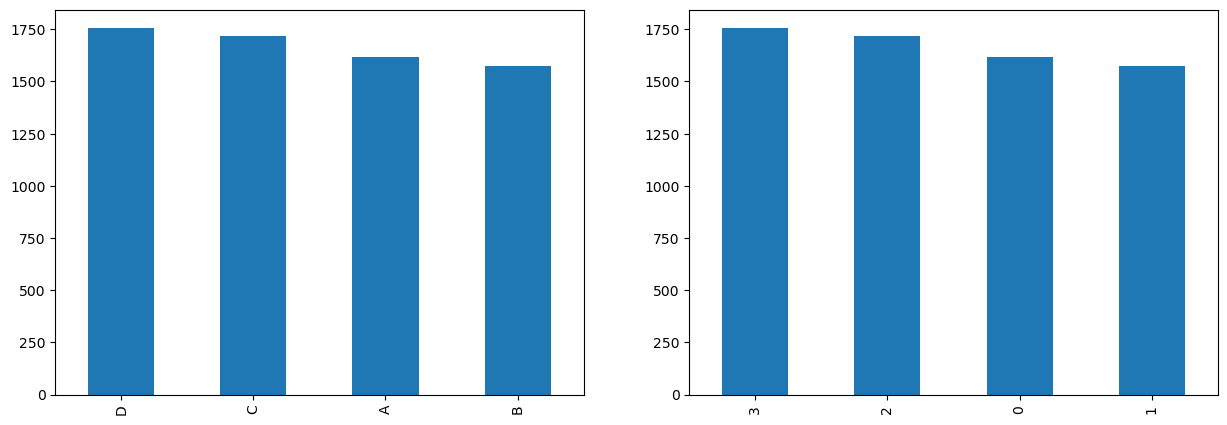

In [30]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
df['Segmentation'].value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
df_dummies['Segmentation'].value_counts().plot(kind = 'bar')
plt.show()

In [31]:
X = df_dummies.drop(['Segmentation','ID'],axis = 1)
y = df_dummies['Segmentation']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [32]:
dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)
pred= dct.predict(X_test)

In [33]:
score= accuracy_score(pred,y_test)
score

0.44561140285071266

In [34]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
pred1= rf.predict(X_test)

In [35]:
score= accuracy_score(pred1,y_test)
score

0.4808702175543886

In [36]:
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans


In [37]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [38]:
X1 = df[['Age' , 'Family_Size']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

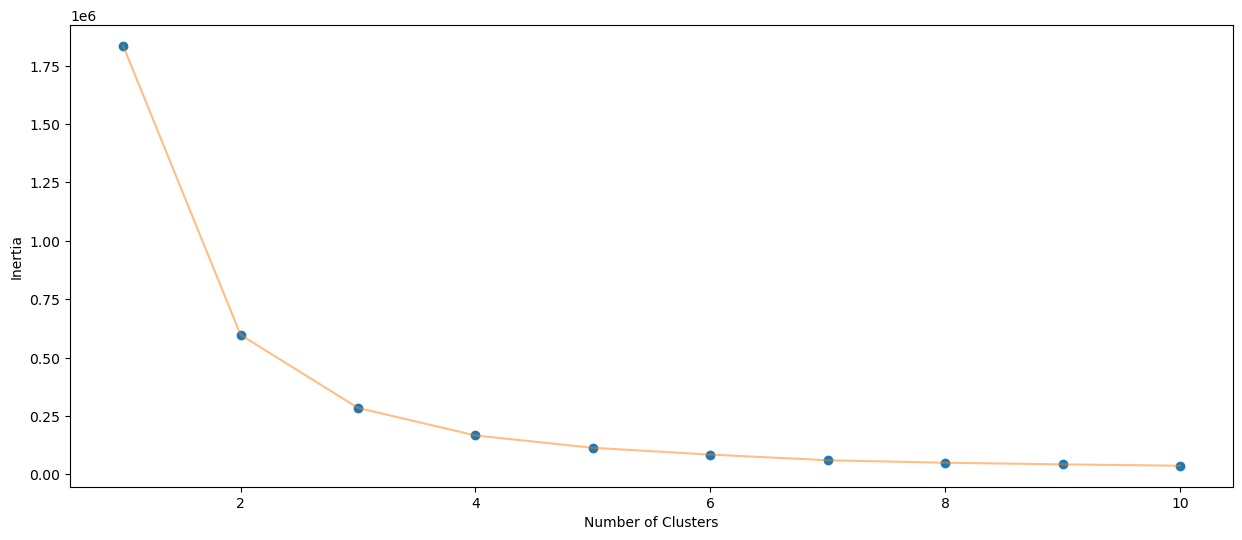

In [39]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [40]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

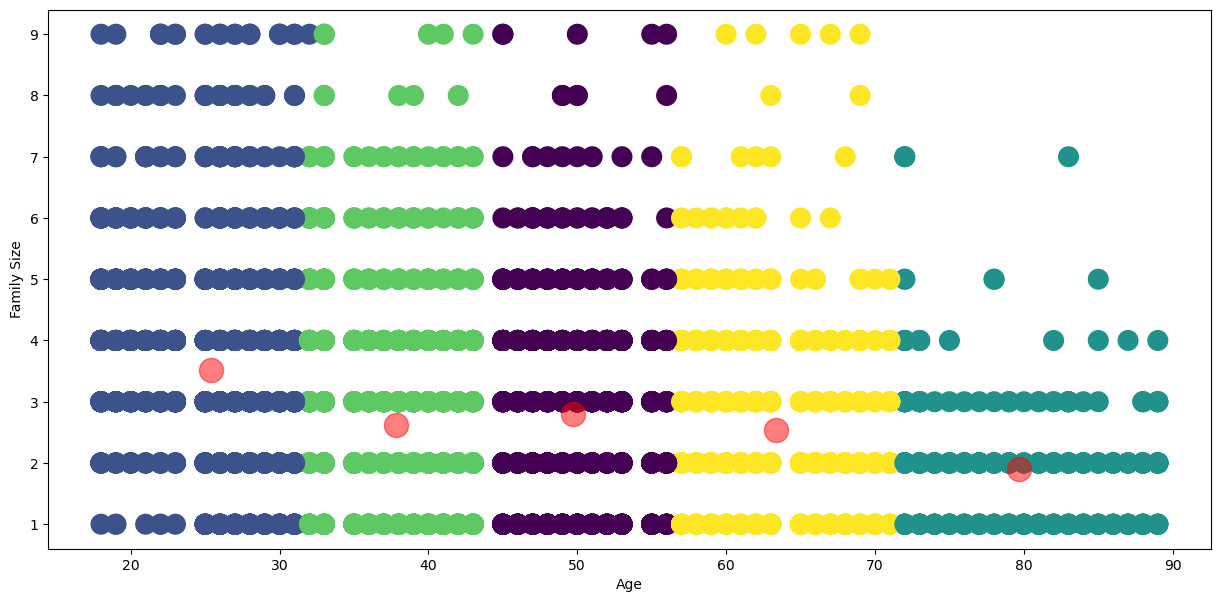

In [41]:
plt.figure(1 , figsize = (15 , 7) )


plt.scatter( x = 'Age' ,y = 'Family_Size' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Family Size') , plt.xlabel('Age')
plt.show()